In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [3]:
data = pd.read_csv("Downloads/diabetes.csv")
X = data.loc[:,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]
X = pd.get_dummies(X, prefix='Glucose', columns=['Glucose'])
y = data['Outcome']
print("Label kelas : ", np.unique(y))

Label kelas :  [0 1]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[ 0.63994726  0.14964075  0.90726993 -0.69289057  0.20401277  0.46849198
   1.4259954  -0.0809511  -0.03610791 -0.03610791 -0.05109761 -0.03610791
  -0.03610791 -0.03610791 -0.03610791 -0.06262243 -0.07235746 -0.03610791
  -0.06262243 -0.07235746 -0.05109761 -0.05109761 -0.05109761 -0.07235746
  -0.06262243 -0.08873565 -0.08873565 -0.06262243 -0.08873565 -0.1148591
  -0.09590841 -0.06262243 -0.09590841 -0.1088931  -0.08873565 -0.12054478
  -0.1088931  -0.1088931  -0.09590841 -0.09590841 -0.13121945 -0.10259784
  -0.1088931  -0.06262243 -0.15045426 -0.15045426 -0.1088931  -0.13121945
  -0.1088931  -0.08873565 -0.13121945 -0.13626313 -0.12054478 -0.13121945
  -0.12598816 -0.08873565 -0.13626313 -0.13121945 -0.0809511  -0.12054478
  -0.1148591  -0.09590841 -0.12054478 -0.08873565 -0.12054478 -0.12054478
  -0.08873565 -0.12598816 -0.1088931  -0.12054478 -0.13626313 -0.1088931
  -0.0809511  -0.12054478 -0.13626313 -0.09590841 -0.0809511  -0.0809511
  -0.0809511  -0.08873565 -0.07235746 -0.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-1.14185152  1.08020025  1.5972786  -0.69289057  1.28282636 -0.3046584
  -1.04154944 -0.0809511  -0.03610791 -0.03610791 -0.05109761 -0.03610791
  -0.03610791 -0.03610791 -0.03610791 -0.06262243 -0.07235746 -0.03610791
  -0.06262243 -0.07235746 -0.05109761 -0.05109761 -0.05109761 -0.07235746
  -0.06262243 -0.08873565 -0.08873565 -0.06262243 -0.08873565 -0.1148591
  -0.09590841 -0.06262243 -0.09590841 -0.1088931  -0.08873565 -0.12054478
  -0.1088931  -0.1088931  -0.09590841 -0.09590841 -0.13121945 -0.10259784
  -0.1088931  -0.06262243 -0.15045426 -0.15045426 -0.1088931  -0.13121945
  -0.1088931  -0.08873565 -0.13121945 -0.13626313 -0.12054478 -0.13121945
  -0.12598816 -0.08873565 -0.13626313 -0.13121945 -0.0809511  -0.12054478
  -0.1148591  -0.09590841 -0.12054478 -0.08873565 -0.12054478 -0.12054478
  -0.08873565 -0.12598816 -0.1088931  -0.12054478 -0.13626313 -0.1088931
  -0.0809511  -0.12054478 -0.13626313 -0.09590841 -0.0809511  -0.0809511
  -0.0809511  -0.08873565 -0.0

In [9]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [10]:
# print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Bias model :  [-0.65153412]
Indeks Support Vector :  [  2   5   9  11  13  15  16  17  18  19  23  25  26  28  31  41  42  47
  48  60  61  62  68  75  79  80  81  82  87  89  93  94  95  96 106 108
 109 110 111 115 116 121 127 130 131 134 141 142 143 147 152 153 154 156
 166 179 182 187 188 193 202 203 205 210 216 217 218 219 222 223 226 228
 234 235 239 243 249 250 252 259 267 268 272 275 278 279 280 281 289 290
 293 296 298 299 300 307 310 320 325 336 339 340 341 346 348 350 352 359
 362 363 365 369 371 372 373 376 377 386 388 389 391 401 405 407 409 410
 417 418 419 420 421 424 426 428 429 433 437 443 446 450 453 455 461 469
 473 486 488 490 494 500 502 516 518 519 523 527 528 532 535 536   0   4
  10  12  14  20  22  35  37  38  43  44  46  49  50  59  64  70  73  74
  76  77  86  88  92  98 100 101 112 113 117 119 120 122 124 125 129 133
 136 138 139 144 145 148 155 161 165 167 168 169 172 173 176 177 181 185
 189 194 206 208 211 224 229 230 231 236 237 244 246 255 256 258 260 26

In [11]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

[1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 0 0]


Matplotlib is building the font cache; this may take a moment.


Akurasi : 73.16017316017316 %


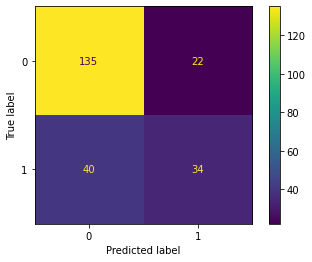

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))